In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score


In [2]:
# Definindo o número máximo de palavras a serem usadas (mais frequentes)
max_features = 20000

# Carregando o dataset IMDb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)


In [3]:
# Definindo o comprimento máximo das resenhas
max_len = 200

# Padronizando as sequências para que todas tenham o mesmo tamanho
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)


In [4]:
# Definindo o modelo
model = Sequential()

# Camada de embedding para transformar os índices em vetores densos
model.add(Embedding(max_features, 128, input_length=max_len))

# Camada LSTM com 128 unidades
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Camada de saída totalmente conectada com ativação sigmoide para classificação binária
model.add(Dense(1, activation='sigmoid'))

# Compilando o modelo com otimizador Adam e função de perda binária
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/Users/joaovictorbezerradeoliveira/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Treinando o modelo
batch_size = 64
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 165ms/step - accuracy: 0.6870 - loss: 0.5752 - val_accuracy: 0.8224 - val_loss: 0.4088
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 173ms/step - accuracy: 0.8738 - loss: 0.3128 - val_accuracy: 0.8144 - val_loss: 0.4123
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 174ms/step - accuracy: 0.8481 - loss: 0.3696 - val_accuracy: 0.8344 - val_loss: 0.3989
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 173ms/step - accuracy: 0.9166 - loss: 0.2194 - val_accuracy: 0.8557 - val_loss: 0.3754
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.9407 - loss: 0.1600 - val_accuracy: 0.8453 - val_loss: 0.4186


In [6]:
# Avaliando o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8438 - loss: 0.4231
Acurácia no conjunto de teste: 0.8453


In [7]:
# Previsão no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia calculada: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step
Acurácia calculada: 0.8453


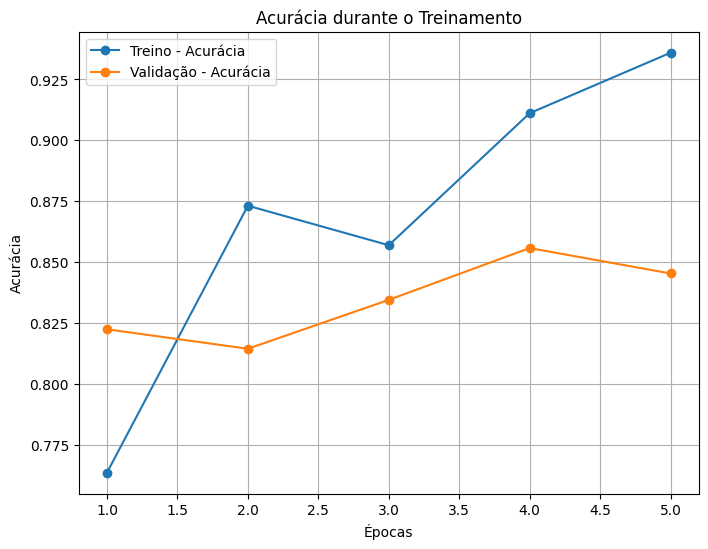

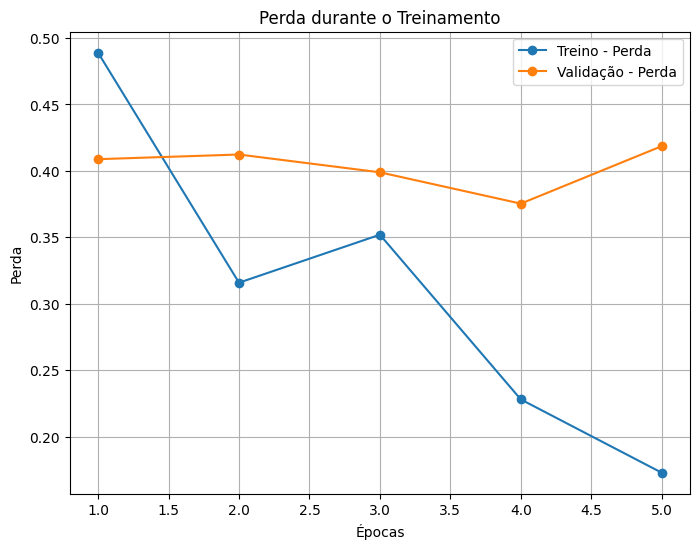

In [11]:
# Obtendo os dados do histórico de treinamento
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Obtendo as perdas (loss)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Definindo o número de épocas
epochs = range(1, len(train_accuracy) + 1)

# Gráfico de Acurácia
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label="Treino - Acurácia", marker='o')
plt.plot(epochs, val_accuracy, label="Validação - Acurácia", marker='o')
plt.title("Acurácia durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Perda
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Treino - Perda", marker='o')
plt.plot(epochs, val_loss, label="Validação - Perda", marker='o')
plt.title("Perda durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()
plt.grid(True)
plt.show()


Defaulting to user installation because normal site-packages is not writeable


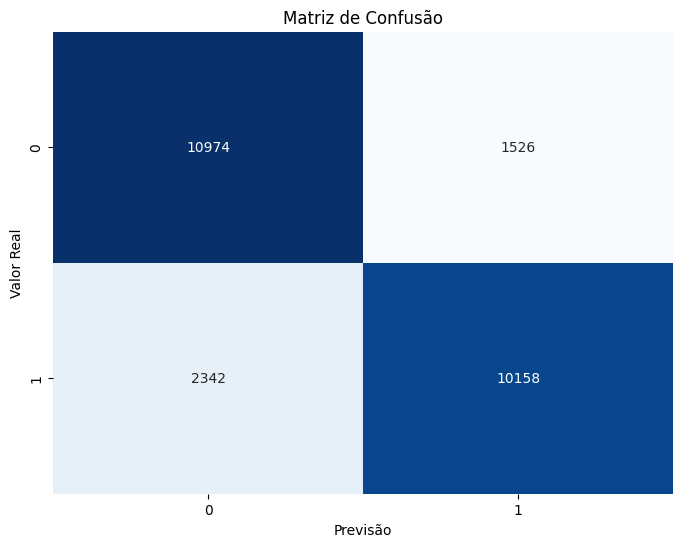

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Simulando as previsões e valores reais (dados não foram fornecidos, então simulação é necessária)
# Vamos assumir que o conjunto de teste tem 200 amostras

# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step


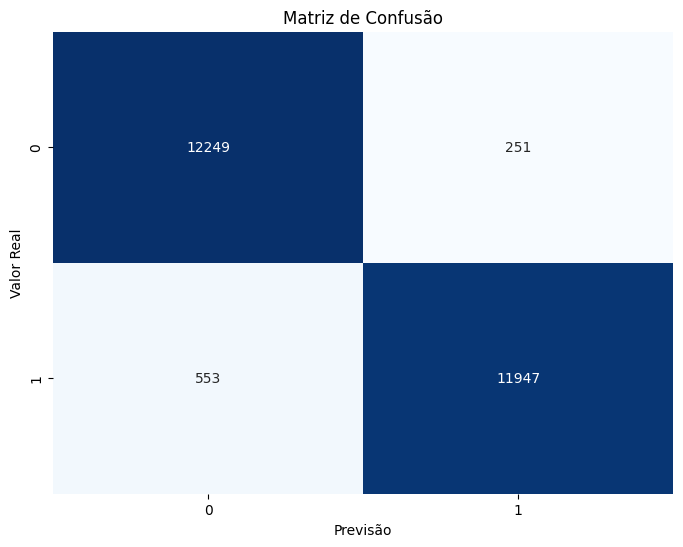

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_train)

# Convertendo as previsões para valores binários (0 ou 1)
y_pred_binary = (y_pred > 0.5).astype("int32")

# Gerando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_binary)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()
